# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# to see response and get what we need from json
from pprint import pprint


In [3]:
# Define function to build these scatterplots
def this_scatter(x_col, y_col, df, xlabel, ylabel, title, file_name):
    fig, ax = plt.subplots()
    ax.scatter(
        x=x_col,
        y=y_col,
        data=df,
        alpha=0.75,
        edgecolors='black'
    )


    # Incorporate the other graph properties
    ax.set_xlabel(xlabel, fontdict={'weight': 700})
    ax.set_ylabel(ylabel, fontdict={'weight': 700})
    # how to get today's date: https://stackoverflow.com/a/60234593
    ax.set_title(
    f"{title} ({time.strftime('%Y-%m-%d')})",
    fontdict={'weight': 700, 'size': 14}
    )

    ax.grid(True)
    ax.set_axisbelow(True)
    
    fig.tight_layout()

    # Save the figure
    fig.savefig("output_data/" + file_name)

    # Show plot
    plt.show()


### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
    city_url = query_url + city
    response = requests.get(city_url)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        # How to convert this dt to human readable format:
        # https://stackoverflow.com/a/75223545
        # and what is the origin: https://openweathermap.org/current
        # and https://www.unixtimestamp.com/
        # eg: pd.to_datetime(1697130302, unit='s',origin='1970-1-1')

        # Append the City information into city_data list
        city_data.append(
            {
                "City": city, 
                "Lat": city_lat, 
                "Lng": city_lng, 
                "Max Temp": city_max_temp,
                "Humidity": city_humidity,
                "Cloudiness": city_clouds,
                "Wind Speed": city_wind,
                "Country": city_country,
                "Date": city_date
            }
        )

    # If an error is experienced, skip the city
    except:
        print(f"City not found. Skipping {city}...")
        pass

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | amahai
Processing Record 2 of Set 1 | saint-pierre
Processing Record 3 of Set 1 | motupe
Processing Record 4 of Set 1 | blackmans bay
Processing Record 5 of Set 1 | olonkinbyen
Processing Record 6 of Set 1 | anadyr
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | bethel
Processing Record 9 of Set 1 | cabo san lucas
Processing Record 10 of Set 1 | arraial do cabo
Processing Record 11 of Set 1 | papatowai
Processing Record 12 of Set 1 | howard springs
Processing Record 13 of Set 1 | cowra
Processing Record 14 of Set 1 | new norfolk
Processing Record 15 of Set 1 | tabou
Processing Record 16 of Set 1 | lebu
Processing Record 17 of Set 1 | fort bragg
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | west island
Processing Record 20 of Set 1 | lohja
Processing Record 21 of Set 1 | carnarvon
Processing Record 22 of Set 1 | bhimunipatnam
Processing Record 23 of

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [9]:
# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,amahai,-3.3333,128.9167,24.96,91,91,1.15,ID,1697134468
1,saint-pierre,-21.3393,55.4781,23.82,83,75,4.12,RE,1697134468
2,motupe,-6.1519,-79.7142,32.11,40,44,3.57,PE,1697134468
3,blackmans bay,-43.0167,147.3167,9.29,86,98,2.76,AU,1697134468
4,olonkinbyen,70.9221,-8.7187,0.95,73,99,7.89,SJ,1697134468


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")


In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,amahai,-3.3333,128.9167,24.96,91,91,1.15,ID,1697134468
1,saint-pierre,-21.3393,55.4781,23.82,83,75,4.12,RE,1697134468
2,motupe,-6.1519,-79.7142,32.11,40,44,3.57,PE,1697134468
3,blackmans bay,-43.0167,147.3167,9.29,86,98,2.76,AU,1697134468
4,olonkinbyen,70.9221,-8.7187,0.95,73,99,7.89,SJ,1697134468


### Create the Scatter Plots Requested



#### Latitude Vs. Temperature

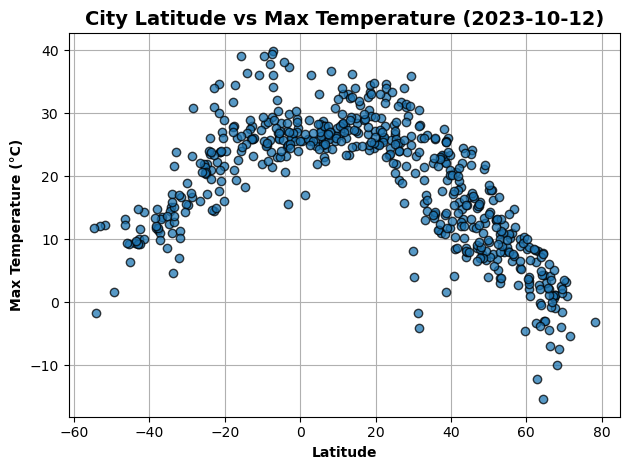

In [12]:
# Build scatter plot for latitude vs. temperature
this_scatter(
    x_col='Lat',
    y_col='Max Temp',
    df=city_data_df,
    xlabel='Latitude',
    ylabel='Max Temperature (°C)',
    title='City Latitude vs Max Temperature',
    file_name='Fig1.png'
)


#### Latitude Vs. Humidity

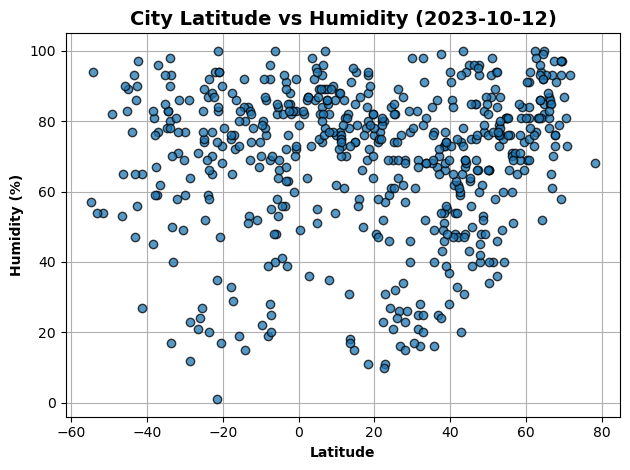

In [13]:
# Build the scatter plots for latitude vs. humidity
this_scatter(
    x_col='Lat',
    y_col='Humidity',
    df=city_data_df,
    xlabel='Latitude',
    ylabel='Humidity (%)',
    title='City Latitude vs Humidity',
    file_name='Fig2.png'
)


#### Latitude Vs. Cloudiness

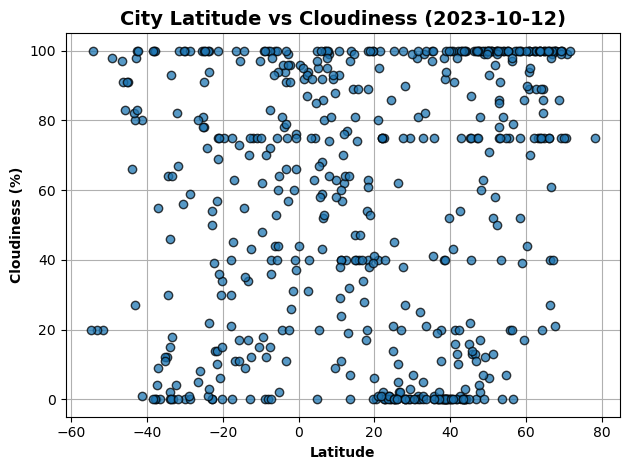

In [14]:
# Build the scatter plots for latitude vs. cloudiness
this_scatter(
    x_col='Lat',
    y_col='Cloudiness',
    df=city_data_df,
    xlabel='Latitude',
    ylabel='Cloudiness (%)',
    title='City Latitude vs Cloudiness',
    file_name='Fig3.png'
)


#### Latitude vs. Wind Speed Plot

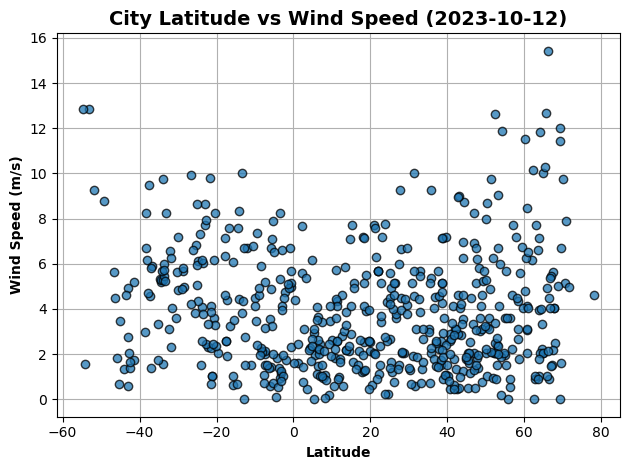

In [15]:
# Build the scatter plots for latitude vs. wind speed
this_scatter(
    x_col='Lat',
    y_col='Wind Speed',
    df=city_data_df,
    xlabel='Latitude',
    ylabel='Wind Speed (m/s)',
    title='City Latitude vs Wind Speed',
    file_name='Fig4.png'
)


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7161472181434118


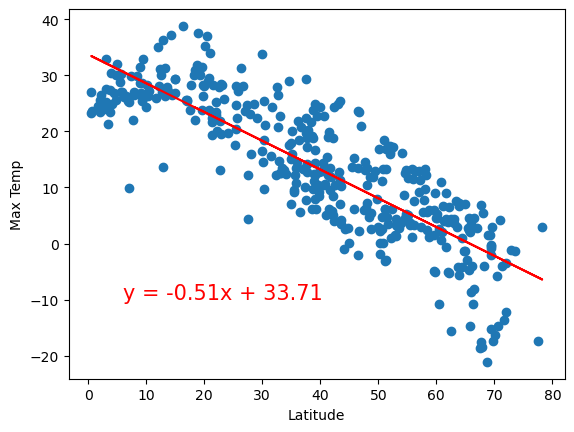

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE


The r-value is: 0.4121057168607245


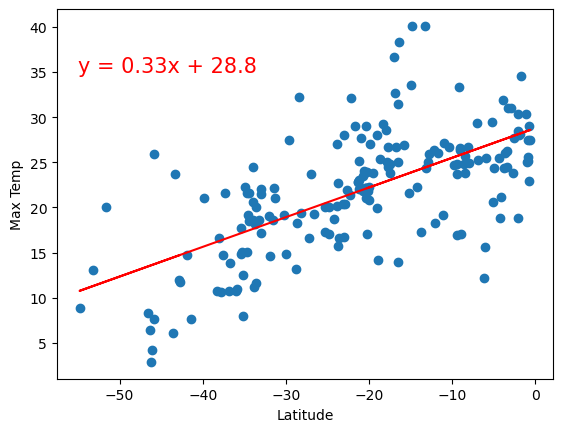

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


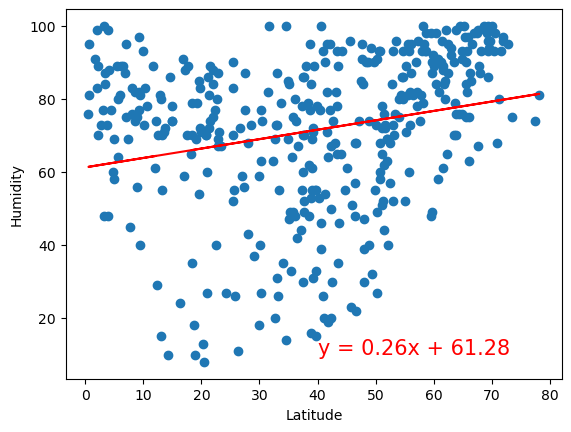

In [17]:
# Northern Hemisphere
# YOUR CODE HERE


The r-value is: 0.0002808747046324607


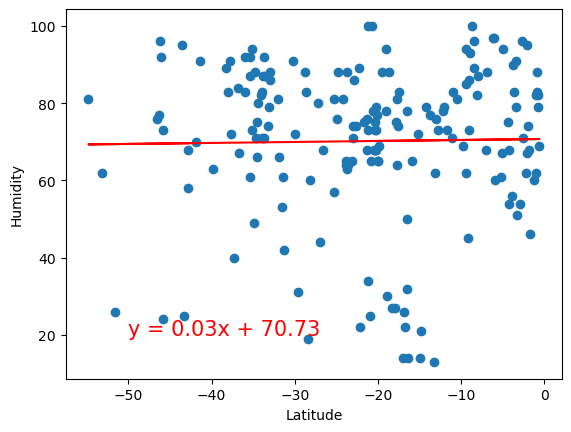

In [18]:
# Southern Hemisphere
# YOUR CODE HERE


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


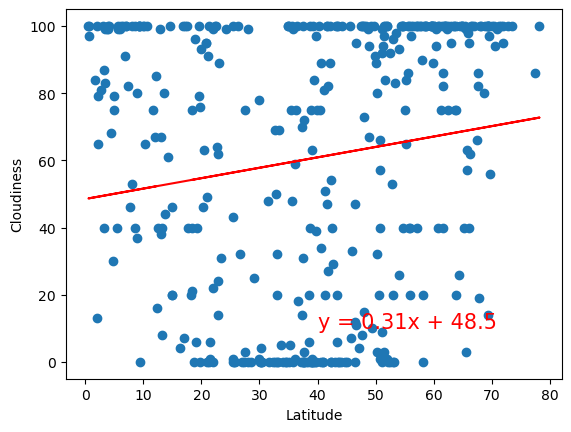

In [19]:
# Northern Hemisphere
# YOUR CODE HERE


The r-value is: 0.02056735429994368


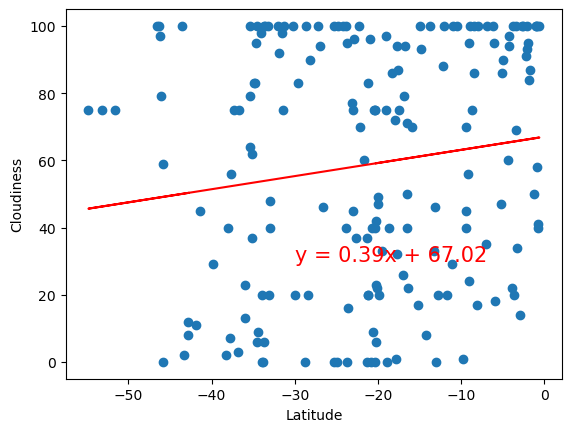

In [20]:
# Southern Hemisphere
# YOUR CODE HERE


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


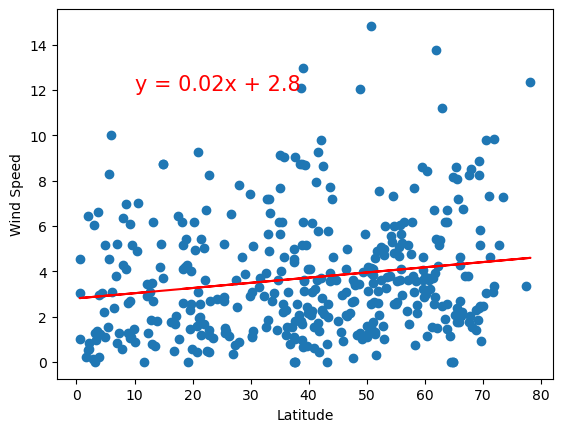

In [21]:
# Northern Hemisphere
# YOUR CODE HERE


The r-value is: 0.062239040700515696


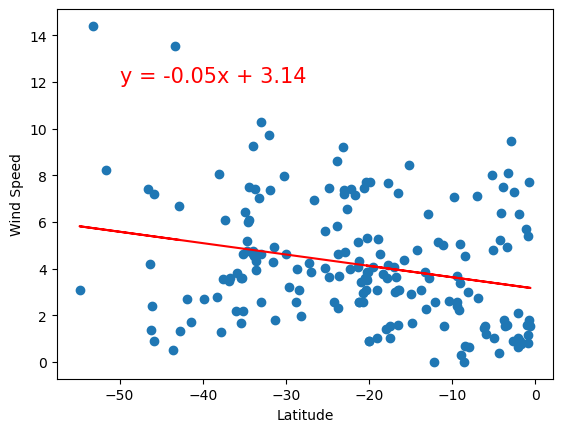

In [22]:
# Southern Hemisphere
# YOUR CODE HERE


**Discussion about the linear relationship:** YOUR RESPONSE HERE